<a href="https://colab.research.google.com/github/louispaulet/Classfication_and_Representation_Learning_course/blob/main/Crossval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Remove warnings generated by polyval function
import warnings
warnings.simplefilter('ignore', np.RankWarning)
from numpy import *
from math import *
import matplotlib.pyplot as plt
# Load the data set
data = loadtxt ( 'polynome.data' )

In [ ]:
# Separate the input from the output
X = data [ : , 0 ]
Y = data [ : , 1 ]
N = len ( X )
order = 20

In [ ]:
# Plot the data
def visualize(w):
  plt.plot ( X , Y ,  'r .'  )
# Plot the fitted curve
  x = linspace(0.,1.,100)
  y = polyval (w , x )
  plt.plot (x,y, '-g')
  plt.title (  'Polynomial regression with order' + str ( len (w ) -1) )
  plt.show( )

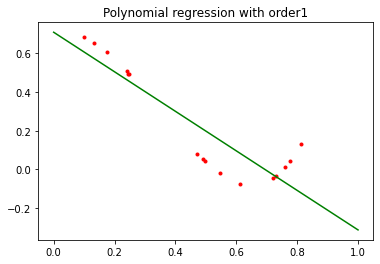

Mean Square Error= 0.014652890071799372


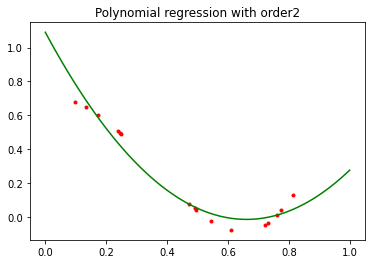

Mean Square Error= 0.0028454931674710103


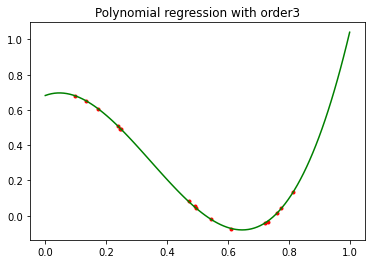

Mean Square Error= 2.921920290709196e-06


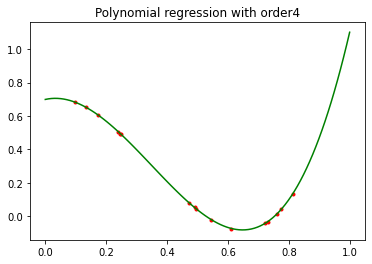

Mean Square Error= 5.868904715291749e-07


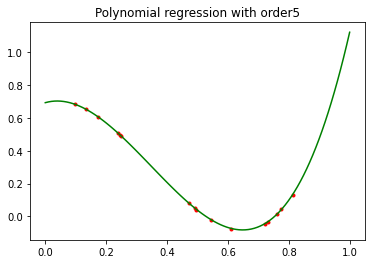

Mean Square Error= 5.490678952884594e-07


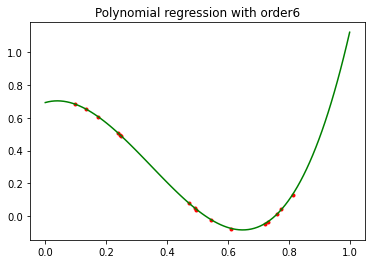

Mean Square Error= 5.490141341900054e-07


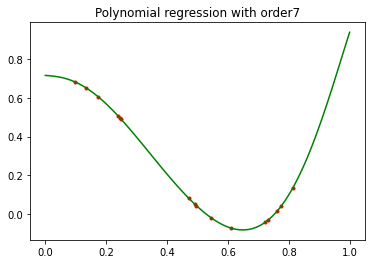

Mean Square Error= 5.169742908129638e-07


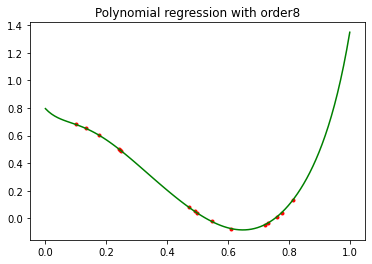

Mean Square Error= 4.7630971336634363e-07


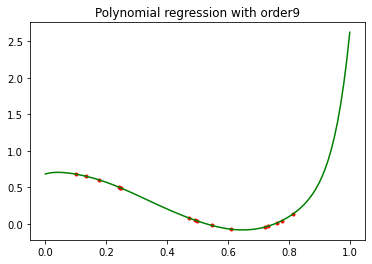

Mean Square Error= 4.410793367680301e-07


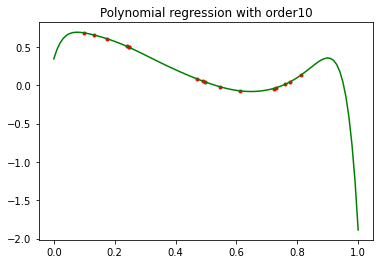

Mean Square Error= 4.32134806873272e-07


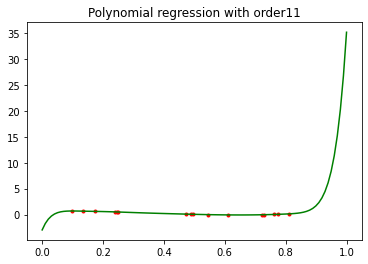

Mean Square Error= 3.225250450167816e-07


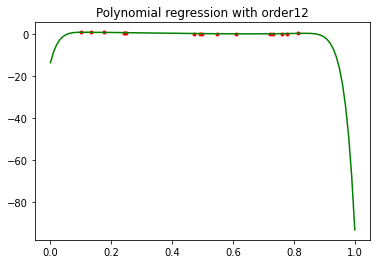

Mean Square Error= 1.367693228335475e-07


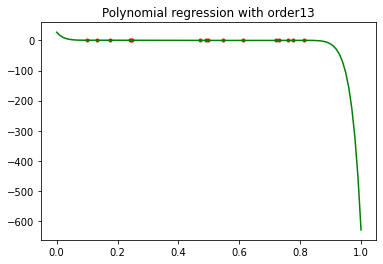

Mean Square Error= 1.2002051731408935e-07


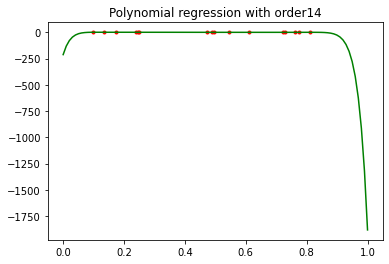

Mean Square Error= 1.1492457901311505e-07


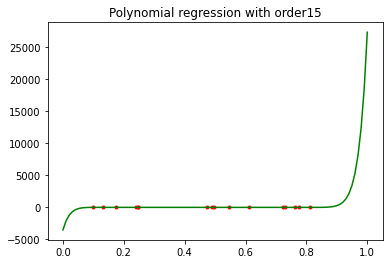

Mean Square Error= 6.207986003889724e-11


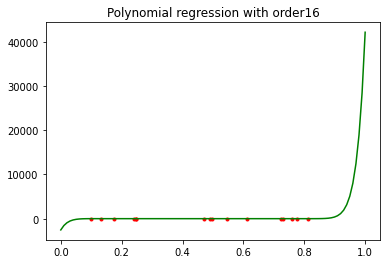

Mean Square Error= 3.754184588386733e-13


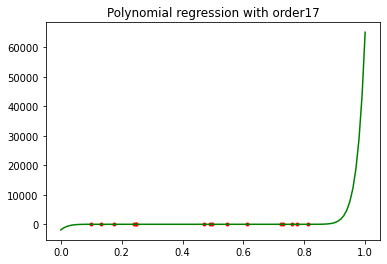

Mean Square Error= 1.680320311591487e-13


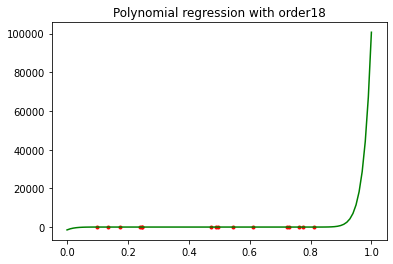

Mean Square Error= 6.746978255085241e-15


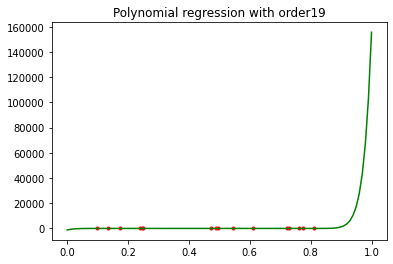

Mean Square Error= 1.0391631297759374e-15


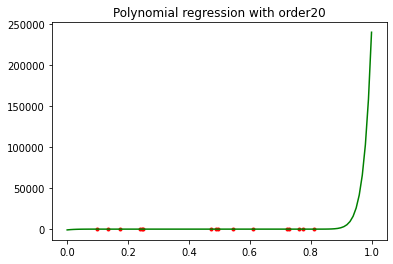

Mean Square Error= 1.271843947121393e-15


In [ ]:

for i in range(1,order+1):
# Apply polynomial regression on the data
    w = polyfit ( X , Y , i )
# Visualize the fit
    visualize(w)
    y_pred = np.polyval(w, X)
    error = np.square(Y - y_pred).sum() / X.shape[0]
    print ('Mean Square Error=', error)
    

In [ ]:
#Creating train and test data sets using hsplit
X_train, X_test= hsplit(X, [11])
Y_train, Y_test= hsplit(X, [11])

In [ ]:
#Creating train and test data sets using train_test_split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
#calculating the RMSE for each order and finding the best fit in simple cross-validation
err_list=[]
rmse=[]
for i in range (1,order+1):
    w1 = polyfit ( Xtrain , Ytrain , i )
    y_pred = np.polyval(w1, Xtest)
    poly_mse = mean_squared_error(Ytest, y_pred)
    poly_rmse = np.sqrt(poly_mse)  
    error = np.square(Ytest - y_pred).sum() / Xtest.shape[0]
    print ('RMSE Error for degree',i ,'=', poly_rmse)
    err_list.append(error)
    rmse.append(poly_rmse)
err_list
rmse
min_value = min(err_list)
min_index = err_list.index(min_value)
rmse_value = min(rmse)
rmse_index = rmse.index(rmse_value)
print("The optimal order is ",rmse_index + 1,"with minimum error", min(rmse))



RMSE Error for degree 1 = 0.1095318402988891
RMSE Error for degree 2 = 0.06548474977281045
RMSE Error for degree 3 = 0.0020112265191759545
RMSE Error for degree 4 = 0.0011114817170978948
RMSE Error for degree 5 = 0.0011977423332430487
RMSE Error for degree 6 = 0.0012071979761411975
RMSE Error for degree 7 = 0.0012719585574399754
RMSE Error for degree 8 = 0.0012593289204283957
RMSE Error for degree 9 = 0.0018199349030426058
RMSE Error for degree 10 = 0.0018626086556191909
RMSE Error for degree 11 = 0.0017484800680438364
RMSE Error for degree 12 = 0.0017046205397974435
RMSE Error for degree 13 = 0.0016964189035117438
RMSE Error for degree 14 = 0.0017049272372665224
RMSE Error for degree 15 = 0.0017202753171609742
RMSE Error for degree 16 = 0.0017375331906911815
RMSE Error for degree 17 = 0.0017543738291855048
RMSE Error for degree 18 = 0.0017698147875445682
RMSE Error for degree 19 = 0.0017835528571170892
RMSE Error for degree 20 = 0.001795614695640939
The optimal order is  4 with minimu

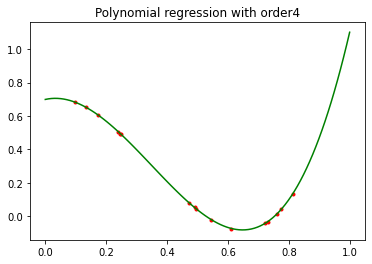

In [ ]:
#Plotting the optimal fit after simple cross validation 
w = polyfit ( X , Y , rmse_index +1 )
    # Visualize the fit
visualize(w)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [ ]:
#defining the Kfold splits
Kcv = KFold(n_splits=2,shuffle = True, random_state=0)

In [ ]:
#creating the train and test data for Kfold 
for train_index, test_index in Kcv.split(X):

  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [ ]:
# Calculating the RMSE after the K-fold cross validation 
krmse = []
for i in range (1,order+1):
    w1 = polyfit ( Xtrain , Ytrain , i )
    y_pred1 = np.polyval(w1, Xtest)
    poly_mse = mean_squared_error(Ytest, y_pred1)
    poly_rmse = np.sqrt(poly_mse)   
    print ('RMSE Error for order ',i ,'=', poly_rmse)
    kerr_list.append(error)
    krmse.append(poly_rmse)
kerr_list
krmse
rmse_value = min(krmse)
rmse_index = krmse.index(rmse_value)
print("The optimal order is ",rmse_index + 1,"with minimum error", min(krmse))

RMSE Error for order  1 = 0.17396588291709555
RMSE Error for order  2 = 0.07545868280506429
RMSE Error for order  3 = 0.0035838842350427095
RMSE Error for order  4 = 0.0015024631370416156
RMSE Error for order  5 = 0.0012422968967054303
RMSE Error for order  6 = 0.0013707991560334726
RMSE Error for order  7 = 0.001976383006361051
RMSE Error for order  8 = 0.0015855968766241872
RMSE Error for order  9 = 0.04017964747254251
RMSE Error for order  10 = 6.390978443468342
RMSE Error for order  11 = 9.778673182076966
RMSE Error for order  12 = 14.741441418074475
RMSE Error for order  13 = 21.887519907758513
RMSE Error for order  14 = 32.00304179310954
RMSE Error for order  15 = 46.08353017878945
RMSE Error for order  16 = 65.365766774336
RMSE Error for order  17 = 91.3591641848418
RMSE Error for order  18 = 125.87597233100422
RMSE Error for order  19 = 171.05980279924353
RMSE Error for order  20 = 229.41212774957197
The optimal order is  5 with minimum error 0.0012422968967054303


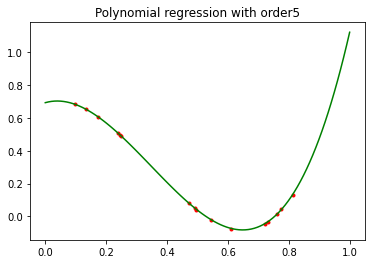

In [ ]:
# Plotting the optimal order for the polynomial regression after k-fold cross validation
z = polyfit ( X , Y , rmse_index + 1 )
    # Visualize the fit
visualize(z)